In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model

In [3]:
# Load the dataset
data = pd.read_csv('traffic_data.csv')

# Separate the target variable 'severity' from other categories
X = data.drop('severity', axis=1)
y = data['severity']

# Preprocess the target variable into numerical data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Preprocess the categories using one-hot encoding
one_hot_encoder = OneHotEncoder()
X = one_hot_encoder.fit_transform(X).toarray()

Epoch 1/1000
15/15 [==============================] - 1s 10ms/step - loss: 1.6096 - accuracy: 0.1625 - val_loss: 1.5428 - val_accuracy: 0.3667
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.5280 - accuracy: 0.3583 - val_loss: 1.4642 - val_accuracy: 0.4667
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.4554 - accuracy: 0.4479 - val_loss: 1.3848 - val_accuracy: 0.5250
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.3817 - accuracy: 0.4854 - val_loss: 1.3010 - val_accuracy: 0.5333
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.3077 - accuracy: 0.5021 - val_loss: 1.2245 - val_accuracy: 0.5500
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.2481 - accuracy: 0.5333 - val_loss: 1.1661 - val_accuracy: 0.5333
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.2023 - accuracy: 0.5458 - val_loss: 1.1293 - val_accuracy: 0.5583
Epoch

c:\Users\Lynn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test Accuracy: 75.3333330154419%


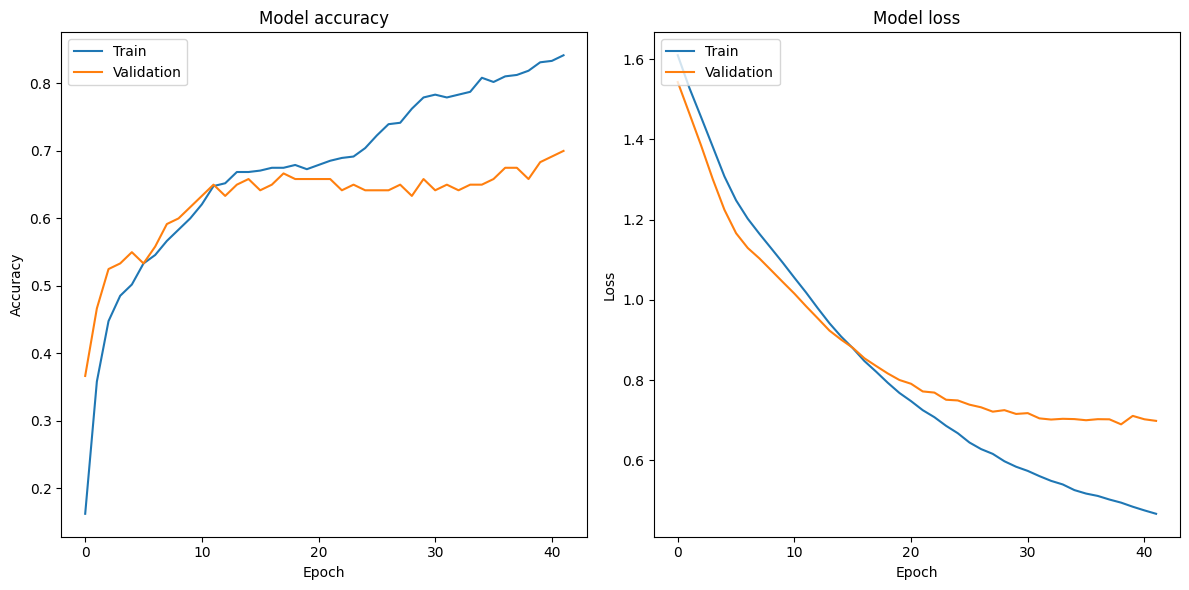

In [14]:
# Split the dataset into training and testing sets with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(5, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, callbacks=[early_stopping], validation_split=0.2)

model.save('traffic_model.h5')

# Load the model
model = load_model('traffic_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100}%')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [5]:
# Load the model
model = load_model('traffic_model.h5')

# User input
roadblock = input("Enter roadblock: ")
time = input("Enter time: ")
weather = input("Enter weather: ")
infrastructure = input("Enter infrastructure: ")
type = input("Enter type: ")
volume = input("Enter volume: ")

user_input = [[roadblock, time, weather, infrastructure, type, volume]]
user_input = one_hot_encoder.transform(user_input).toarray()

# Make a prediction
prediction = model.predict(user_input)

# Convert prediction to label
severity = label_encoder.inverse_transform([prediction.argmax()])[0]

print(f'The predicted severity is: {severity}')

1/1 [==============================] - 0s 85ms/step
The predicted severity is: very-low


c:\Users\Lynn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
